In [ ]:
#baseline prediction: use the average salary for each industry

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import sys
sys.path.insert(0, './modules')
from helpers import salary_preprocess, apply_scaler

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
training, test = salary_preprocess()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   jobId                  999995 non-null  object  
 1   companyId              999995 non-null  category
 2   jobType                999995 non-null  category
 3   degree                 999995 non-null  category
 4   major                  999995 non-null  category
 5   industry               999995 non-null  category
 6   yearsExperience        999995 non-null  int64   
 7   milesFromMetropolis    999995 non-null  int64   
 8   salary                 999995 non-null  int64   
 9   companyId_transformed  999995 non-null  int64   
 10  jobType_transformed    999995 non-null  int64   
 11  degree_transformed     999995 non-null  int64   
 12  major_transformed      999995 non-null  int64   
 13  industry_transformed   999995 non-null  int64   
 14  companyId_encoded   

In [3]:
training.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,companyId_transformed,jobType_transformed,degree_transformed,major_transformed,industry_transformed,companyId_encoded,jobType_encoded,degree_encoded,major_encoded,industry_encoded
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115,135,130,133,115,31,1,3,6,3
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,115,145,101,102,121,11,0,2,7,6
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,116,125,135,130,115,48,7,1,8,3
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,116,115,135,129,109,32,5,1,2,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,115,125,125,130,130,60,7,0,8,2


In [4]:
test.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,companyId_transformed,jobType_transformed,degree_transformed,major_transformed,industry_transformed,companyId_encoded,jobType_encoded,degree_encoded,major_encoded,industry_encoded
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,116,115,101,102,115,27,5,2,7,3
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,116,95,98,102,109,5,4,4,7,0
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,116,135,130,127,115,2,2,3,0,3
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,116,115,101,102,130,14,5,2,7,4
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,116,95,135,127,130,30,4,1,0,4


## baseline model
### test a few baseline models and calculate the Mean Squared Error (MSE) in the training dataset
* use the average salary of each industry
* use the average salary of each major
* use the average salary of each degree
* use the averaged salary of each jobType
Observations: prediction by jobType has the smallest MSE 964

In [5]:
#the variable 'industry_transformed' had transformed each indusstry with the mean salary of that industry
#thus it can server as our prediction, same with 'major_transformed', 'degree_transformed', 'jobType_transformed'
prediction_by_industry = mean_squared_error(training['salary'], training['industry_transformed'])
print('Prediction by industry is {}'.format(prediction_by_industry))
prediction_by_major = mean_squared_error(training['salary'], training['major_transformed'])
print('Prediction by major is {}'.format(prediction_by_major))
prediction_by_degree = mean_squared_error(training['salary'], training['degree_transformed'])
print('Prediction by degree is {}'.format(prediction_by_degree))
prediction_by_jobType = mean_squared_error(training['salary'], training['jobType_transformed'])
print('Prediction by jobType is {}'.format(prediction_by_jobType))

Prediction by industry is 1367.553857769289
Prediction by major is 1284.359867799339
Prediction by degree is 1257.9450257251285
Prediction by jobType is 964.1528867644338


In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [33]:
models = []
mean_mse = {}
cv_std = {}
res = {}
n_procs = 4

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators = 80, n_jobs = n_procs, max_depth = 20, min_samples_split = 70,
                          max_features = 7, verbose = 0)
gbm = GradientBoostingRegressor(n_estimators = 40, max_depth = 7, loss = 'ls', verbose = 0)

models.extend([lr, rf, gbm])

In [34]:
feature_transformed = ['yearsExperience', 'milesFromMetropolis', 'companyId_transformed', 
                'jobType_transformed', 'degree_transformed', 'major_transformed', 'industry_transformed']
feature_encoded = ['yearsExperience', 'milesFromMetropolis', 'companyId_transformed', 
                'jobType_encoded', 'degree_encoded', 'major_encoded', 'industry_encoded']

In [35]:
from helpers import cross_val_model, print_summary, get_model_feature_importances

In [27]:
print('Cross validating the models with feature transformed not scaled')
for model in models:
    cross_val_model(model, training[feature_transformed], training['salary'], n_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Cross validating the models

model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 399.76411750689886
Standard deviation during cross validation:
 1.8549688001014204

model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=70,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
Average MSE:
 365.80906194130364
Standard deviation during cross validation:
 1.5666464990860545

model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
        

In [36]:
print('Cross validating the models with feature_encoded not scaled')
for model in models:
    cross_val_model(model, training[feature_encoded], training['salary'], n_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Cross validating the models with feature_encoded not scaled

model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 925.0988135468145
Standard deviation during cross validation:
 3.4474639937020055

model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=70,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
Average MSE:
 372.4567506438425
Standard deviation during cross validation:
 1.605247394563955

model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, 

In [37]:
#scale numeric variables
#weight to see whether to run it or not
training, test = apply_scaler(training, test, 'salary')


The following columns are scaled:

['yearsExperience', 'milesFromMetropolis', 'companyId_transformed', 'jobType_transformed', 'degree_transformed', 'major_transformed', 'industry_transformed', 'companyId_encoded', 'jobType_encoded', 'degree_encoded', 'major_encoded', 'industry_encoded']


In [31]:
print('Cross validating the models with feature_transformed and scaled')
for model in models:
    cross_val_model(model, training[feature_cols], training['salary'], n_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Cross validating the models using the transformed and scaled features

model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 399.76411750689886
Standard deviation during cross validation:
 1.8549688001014253

model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=70,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
Average MSE:
 365.746557893401
Standard deviation during cross validation:
 1.615472118319618

model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_featu

In [38]:
print('Cross validating the models with feature_encoded and scaled')
for model in models:
    cross_val_model(model, training[feature_encoded], training['salary'], n_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Cross validating the models with feature_encoded and scaled

model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 925.0988135468145
Standard deviation during cross validation:
 3.4474639937020055

model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=70,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
Average MSE:
 372.50841917710426
Standard deviation during cross validation:
 1.6280572433092986

model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None

In [39]:
# selecting the best model based on MSE
# transformed and scaled features using Gradient boosting
bestModel = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
#train the best model on the whole dataset
bestModel.fit(training[feature_transformed], training['salary'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
def get_model_feature_importances(model, feature_df):
    ''' Gets and sorts the importance of every feature as a predictor of the target '''
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = [0] * len(feature_df.columns)
    
    feature_importances = pd.DataFrame({'feature': feature_df.columns, 'importance': importances})
    feature_importances.sort_values(by = 'importance', ascending = False, inplace = True)
    ''' set the index to 'feature' '''
    feature_importances.set_index('feature', inplace = True, drop = True)
    return feature_importances

In [42]:
#prediction on the test data
predicted_salaries = bestModel.predict(test[feature_transformed])

In [43]:
# updating the test dataset with the 'predicted_salary' column
test['predicted_salary'] = predicted_salaries.tolist()

In [44]:
#Exame the test data
test.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,companyId_transformed,jobType_transformed,degree_transformed,major_transformed,industry_transformed,companyId_encoded,jobType_encoded,degree_encoded,major_encoded,industry_encoded,predicted_salary
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,1.387556,0.812759,0.865323,-0.026239,-0.935668,-0.919415,-0.038153,-0.220376,0.652211,-0.087063,0.658738,-0.000168,110.640110
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,1.110256,-0.087589,0.865323,-0.887131,-1.128620,-0.919415,-0.568060,-1.431173,0.215859,1.332474,0.658738,-1.499643,94.099901
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,0.694305,-1.403483,0.865323,0.834654,0.929533,0.775742,-0.038153,-1.596282,-0.656847,0.622705,-2.259330,-0.000168,173.745951
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,0.278354,1.609221,0.865323,-0.026239,-0.935668,-0.919415,1.286615,-0.935847,0.652211,-0.087063,0.658738,0.499657,104.109917
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,-0.276248,-0.191476,0.865323,-0.887131,1.251119,0.775742,1.286615,-0.055267,0.215859,-0.796832,-2.259330,0.499657,114.227979
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,-0.830849,-0.918680,0.865323,0.834654,0.929533,1.114773,1.286615,0.219914,-0.656847,0.622705,-1.008729,-0.499993,151.734552
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,-0.830849,-0.607021,-1.155638,-0.456685,0.929533,1.114773,-1.009649,-0.275412,1.088564,0.622705,-1.008729,0.999482,98.619885
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,-0.414898,0.812759,0.865323,1.265100,0.607947,0.775742,-1.009649,-1.541246,-1.529552,-1.506601,-2.259330,0.999482,118.950473
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,-0.830849,0.985903,0.865323,-0.026239,1.251119,0.979161,-0.038153,0.109842,0.652211,-0.796832,1.075605,-0.000168,110.858871
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,1.526207,1.643850,0.865323,0.404208,-1.128620,-0.919415,-0.568060,-0.880811,1.524917,1.332474,0.658738,-1.499643,97.017303


In [45]:
# Writing the test dataset to the csv file
test.to_csv('test_salary.csv', index = False)

In [48]:
# check feature importance
feature_importances = get_model_feature_importances(bestModel, training[feature_transformed])

<AxesSubplot:xlabel='feature'>

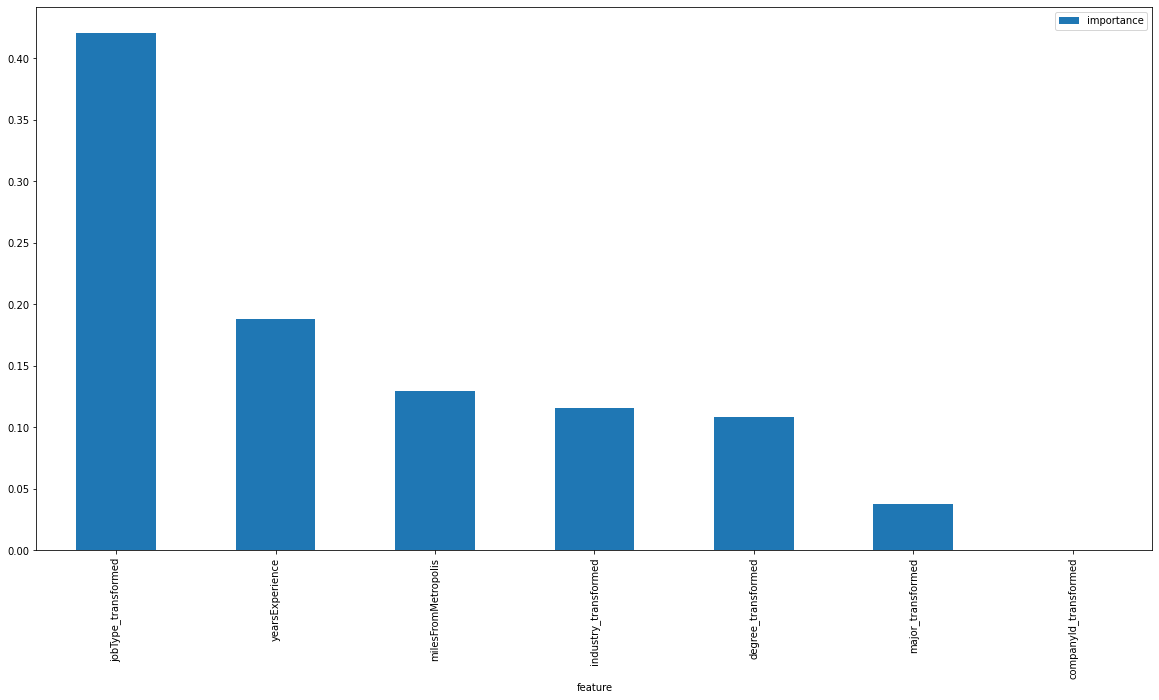

In [49]:
feature_importances.plot.bar(figsize=(20,10))
#observations: 